# Correlation Analysis

The objective of this notebook is to perform a correlation analysis between the age-standardized mortality rates and the following variables: Population Density, Hospital Beds, and Poverty Incidence.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
sns.set_context("paper")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/SMSL/COVID-19 Mortality Rates

Mounted at /content/drive
/content/drive/My Drive/SMSL/COVID-19 Mortality Rates


## Exploratory Data Analysis

In [ ]:
mortality_rates = pd.read_excel("output/mortality_rates.xlsx", index_col=0)
mortality_rates = mortality_rates.rename(columns={
    "crude per 100k": "Crude",
    "age-standardized per 100k": "Age-Standardized"
})
mortality_rates

,Crude,Age-Standardized
ABRA,62.322969,47.368369
AGUSAN DEL NORTE,78.587174,77.397950
AGUSAN DEL SUR,45.122501,50.589968
AKLAN,41.110304,33.988423
ALBAY,27.029981,25.471226
...,...,...
TAWI-TAWI,1.368161,2.221281
ZAMBALES,90.710054,81.157044
ZAMBOANGA DEL NORTE,27.819816,27.468587
ZAMBOANGA DEL SUR,53.375148,57.170267


### Population Density

In [ ]:
population_density = pd.read_excel("data/Population Density/Population Density 2020.xlsx", index_col=0)[["Population Density"]]
population_density = population_density.rename_axis(index=None)
population_density

,Population Density
NCR,21765.280692
ABRA,59.762317
APAYAO,27.622587
BENGUET,292.593195
IFUGAO,79.257910
...,...
BASILAN,123.415918
LANAO DEL SUR,79.407340
MAGUINDANAO,134.644589
SULU,219.941238


In [ ]:
for p in mortality_rates.index:
    if p not in population_density.index:
        print(p)

In [ ]:
for p in population_density.index:
    if p not in mortality_rates.index:
        print(p)

### Hospital Beds

In [ ]:
hospital_beds = pd.read_excel('data/Hospital Beds/hospital_beds_by_province_2022.xlsx', index_col=0)
hospital_beds = hospital_beds.rename_axis(index=None)
hospital_beds

,private_beds,government_beds,total_beds,population,beds_per_100000_private,beds_per_100000_government,beds_per_100000_total
ABRA,41,50,91,250309,16.379755,19.975311,36.355065
AGUSAN DEL NORTE,348,250,598,757121,45.963591,33.019821,78.983412
AGUSAN DEL SUR,80,180,260,737991,10.840241,24.390541,35.230782
AKLAN,305,300,605,612985,49.756519,48.940839,98.697358
ALBAY,558,375,933,1372550,40.654257,27.321409,67.975666
...,...,...,...,...,...,...,...
TAWI-TAWI,0,190,190,438545,0.000000,43.325086,43.325086
ZAMBALES,195,559,754,906184,21.518809,61.687251,83.206060
ZAMBOANGA DEL NORTE,61,376,437,1046017,5.831645,35.945879,41.777524
ZAMBOANGA DEL SUR,1107,710,1817,2017793,54.861921,35.186959,90.048880


In [ ]:
for p in mortality_rates.index:
    if p not in hospital_beds.index:
        print(p)

DINAGAT ISLANDS


In [ ]:
for p in hospital_beds.index:
    if p not in mortality_rates.index:
        print(p)

### Poverty Incidence

In [ ]:
poverty_incidence = pd.read_excel("data/Poverty Incidence/Poverty Incidence Among Population 2021.xlsx", index_col=0)
poverty_incidence = poverty_incidence.rename_axis(index=None)
poverty_incidence

,Poverty Incidence
ABRA,21.5
AGUSAN DEL NORTE,30.8
AGUSAN DEL SUR,41.3
AKLAN,20.2
ALBAY,20.4
...,...
TAWI-TAWI,36.5
ZAMBALES,24.4
ZAMBOANGA DEL NORTE,50.8
ZAMBOANGA DEL SUR,18.3


In [ ]:
for p in mortality_rates.index:
    if p not in poverty_incidence.index:
        print(p)

In [ ]:
for p in poverty_incidence.index:
    if p not in mortality_rates.index:
        print(p)

## Correlation Analysis

Spearman's Rank Correlation Coefficient
- does not assume a normal distribution

In [ ]:
dataset = pd.DataFrame()
dataset = mortality_rates
dataset[population_density.columns] = population_density
dataset[hospital_beds.columns] = hospital_beds
dataset[poverty_incidence.columns] = poverty_incidence
dataset

,Crude,Age-Standardized,Population Density,private_beds,government_beds,total_beds,population,beds_per_100000_private,beds_per_100000_government,beds_per_100000_total,Poverty Incidence
ABRA,62.322969,47.368369,59.762317,41.0,50.0,91.0,250309.0,16.379755,19.975311,36.355065,21.5
AGUSAN DEL NORTE,78.587174,77.397950,221.807919,348.0,250.0,598.0,757121.0,45.963591,33.019821,78.983412,30.8
AGUSAN DEL SUR,45.122501,50.589968,74.014267,80.0,180.0,260.0,737991.0,10.840241,24.390541,35.230782,41.3
AKLAN,41.110304,33.988423,349.642106,305.0,300.0,605.0,612985.0,49.756519,48.940839,98.697358,20.2
ALBAY,27.029981,25.471226,533.909146,558.0,375.0,933.0,1372550.0,40.654257,27.321409,67.975666,20.4
...,...,...,...,...,...,...,...,...,...,...,...
TAWI-TAWI,1.368161,2.221281,121.403538,0.0,190.0,190.0,438545.0,0.000000,43.325086,43.325086,36.5
ZAMBALES,90.710054,81.157044,238.492406,195.0,559.0,754.0,906184.0,21.518809,61.687251,83.206060,24.4
ZAMBOANGA DEL NORTE,27.819816,27.468587,143.484824,61.0,376.0,437.0,1046017.0,5.831645,35.945879,41.777524,50.8
ZAMBOANGA DEL SUR,53.375148,57.170267,343.775714,1107.0,710.0,1817.0,2017793.0,54.861921,35.186959,90.048880,18.3


In [ ]:
# filter dataset
dataset = dataset[['Crude', 'Age-Standardized', 'Population Density', 'Poverty Incidence',
    'beds_per_100000_private', 'beds_per_100000_government', 'beds_per_100000_total']]
dataset

,Crude,Age-Standardized,Population Density,Poverty Incidence,beds_per_100000_private,beds_per_100000_government,beds_per_100000_total
ABRA,62.322969,47.368369,59.762317,21.5,16.379755,19.975311,36.355065
AGUSAN DEL NORTE,78.587174,77.397950,221.807919,30.8,45.963591,33.019821,78.983412
AGUSAN DEL SUR,45.122501,50.589968,74.014267,41.3,10.840241,24.390541,35.230782
AKLAN,41.110304,33.988423,349.642106,20.2,49.756519,48.940839,98.697358
ALBAY,27.029981,25.471226,533.909146,20.4,40.654257,27.321409,67.975666
...,...,...,...,...,...,...,...
TAWI-TAWI,1.368161,2.221281,121.403538,36.5,0.000000,43.325086,43.325086
ZAMBALES,90.710054,81.157044,238.492406,24.4,21.518809,61.687251,83.206060
ZAMBOANGA DEL NORTE,27.819816,27.468587,143.484824,50.8,5.831645,35.945879,41.777524
ZAMBOANGA DEL SUR,53.375148,57.170267,343.775714,18.3,54.861921,35.186959,90.048880


In [ ]:
dataset = dataset.rename(columns={
    'Crude': 'Crude Mortality Rates',
    'Age-Standardized': 'Age-Standardized Mortality Rates',
    'Population Density': 'Population Density',
    'Poverty Incidence': 'Poverty Incidence',
    'beds_per_100000_private': 'Private Hospital Beds per 100,000',
    'beds_per_100000_government': 'Government Hospital Beds per 100,000',
    'beds_per_100000_total': 'Total Hospital Beds per 100,000'
})
dataset

,Crude Mortality Rates,Age-Standardized Mortality Rates,Population Density,Poverty Incidence,"Private Hospital Beds per 100,000","Government Hospital Beds per 100,000","Total Hospital Beds per 100,000"
ABRA,62.322969,47.368369,59.762317,21.5,16.379755,19.975311,36.355065
AGUSAN DEL NORTE,78.587174,77.397950,221.807919,30.8,45.963591,33.019821,78.983412
AGUSAN DEL SUR,45.122501,50.589968,74.014267,41.3,10.840241,24.390541,35.230782
AKLAN,41.110304,33.988423,349.642106,20.2,49.756519,48.940839,98.697358
ALBAY,27.029981,25.471226,533.909146,20.4,40.654257,27.321409,67.975666
...,...,...,...,...,...,...,...
TAWI-TAWI,1.368161,2.221281,121.403538,36.5,0.000000,43.325086,43.325086
ZAMBALES,90.710054,81.157044,238.492406,24.4,21.518809,61.687251,83.206060
ZAMBOANGA DEL NORTE,27.819816,27.468587,143.484824,50.8,5.831645,35.945879,41.777524
ZAMBOANGA DEL SUR,53.375148,57.170267,343.775714,18.3,54.861921,35.186959,90.048880


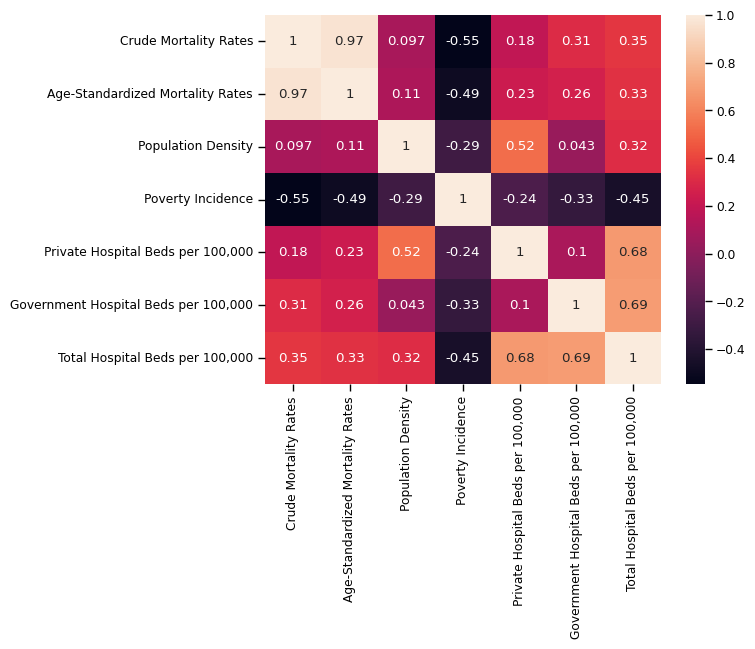

In [ ]:
correlation = dataset.corr(method='spearman')
sns.heatmap(correlation, annot=True)
plt.savefig("output/correlation.png", bbox_inches ="tight")

In [ ]:
correlation.to_excel("output/correlation.xlsx")
correlation

,Crude Mortality Rates,Age-Standardized Mortality Rates,Population Density,Poverty Incidence,"Private Hospital Beds per 100,000","Government Hospital Beds per 100,000","Total Hospital Beds per 100,000"
Crude Mortality Rates,1.000000,0.965050,0.097074,-0.547969,0.184118,0.307439,0.347173
Age-Standardized Mortality Rates,0.965050,1.000000,0.111329,-0.491047,0.228366,0.258952,0.334705
Population Density,0.097074,0.111329,1.000000,-0.288377,0.523586,0.042882,0.315562
Poverty Incidence,-0.547969,-0.491047,-0.288377,1.000000,-0.236397,-0.332481,-0.448287
"Private Hospital Beds per 100,000",0.184118,0.228366,0.523586,-0.236397,1.000000,0.100271,0.676475
"Government Hospital Beds per 100,000",0.307439,0.258952,0.042882,-0.332481,0.100271,1.000000,0.688930
"Total Hospital Beds per 100,000",0.347173,0.334705,0.315562,-0.448287,0.676475,0.688930,1.000000


## P-Values

In [ ]:
# https://www.statology.org/p-value-correlation-pandas/
def r_pvalues(df):
    cols = pd.DataFrame(columns=df.columns)
    p = cols.transpose().join(cols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            p[r][c] = round(stats.pearsonr(tmp[r], tmp[c])[1], 4)
    return p

In [ ]:
p = r_pvalues(dataset)
p.to_excel('output/pvalues.xlsx')
p

,Crude Mortality Rates,Age-Standardized Mortality Rates,Population Density,Poverty Incidence,"Private Hospital Beds per 100,000","Government Hospital Beds per 100,000","Total Hospital Beds per 100,000"
Crude Mortality Rates,0.0,0.0,0.2037,0.0,0.0968,0.0652,0.0107
Age-Standardized Mortality Rates,0.0,0.0,0.0813,0.0,0.0276,0.1122,0.009
Population Density,0.2037,0.0813,0.0,0.0462,0.0171,0.1533,0.0104
Poverty Incidence,0.0,0.0,0.0462,0.0,0.0081,0.0031,0.0
"Private Hospital Beds per 100,000",0.0968,0.0276,0.0171,0.0081,0.0,0.4722,0.0
"Government Hospital Beds per 100,000",0.0652,0.1122,0.1533,0.0031,0.4722,0.0,0.0
"Total Hospital Beds per 100,000",0.0107,0.009,0.0104,0.0,0.0,0.0,0.0
